In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
from tensorflow.keras.preprocessing import image

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
os.listdir(data_dir) # checking whether they present or not

['LICENSE.txt', 'daisy', 'dandelion', 'sunflowers', 'roses', 'tulips']

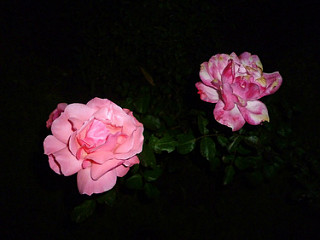

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [ ]:
cv2.imread(str(roses[0])).shape

(333, 500, 3)

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size = batch_size,
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# building a network

num_classes = 5

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation="softmax"),
])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=11,
)

Epoch 1/11
92/92 [==============================] - 117s 1s/step - loss: 0.4671 - accuracy: 0.8229 - val_loss: 1.0308 - val_accuracy: 0.6621
Epoch 2/11
92/92 [==============================] - 118s 1s/step - loss: 0.2964 - accuracy: 0.8965 - val_loss: 1.2191 - val_accuracy: 0.6431
Epoch 3/11
92/92 [==============================] - 115s 1s/step - loss: 0.1957 - accuracy: 0.9329 - val_loss: 1.6067 - val_accuracy: 0.6553
Epoch 4/11
92/92 [==============================] - 117s 1s/step - loss: 0.1297 - accuracy: 0.9619 - val_loss: 1.7821 - val_accuracy: 0.6417
Epoch 5/11
92/92 [==============================] - 117s 1s/step - loss: 0.0898 - accuracy: 0.9700 - val_loss: 1.6980 - val_accuracy: 0.6362
Epoch 6/11
92/92 [==============================] - 117s 1s/step - loss: 0.1119 - accuracy: 0.9642 - val_loss: 1.7317 - val_accuracy: 0.6458
Epoch 7/11
92/92 [==============================] - 117s 1s/step - loss: 0.0704 - accuracy: 0.9772 - val_loss: 2.1332 - val_accuracy: 0.6362
Epoch 8/11
92

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 32)       

In [5]:
# Load and preprocess the image
img_path = 'images.jpeg'  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)

img_array.shape

(180, 180, 3)

In [6]:
img_array = tf.expand_dims(img_array, 0)
img_array.shape

TensorShape([1, 180, 180, 3])

In [ ]:
# Make predictions
predictions = model.predict(img_array)
class_index = np.argmax(predictions)
class_probability = predictions[0, class_index]

print(f"Predicted Class Index: {class_index}")
print(f"Predicted Class Probability: {class_probability}")

1/1 [==============================] - 0s 289ms/step
Predicted Class Index: 4
Predicted Class Probability: 0.6130031943321228


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
predictions

array([[0.01771778, 0.0023247 , 0.34779236, 0.01916196, 0.6130032 ]],
      dtype=float32)

thanks